Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), имя пользователя (name), и дату этих покупок (date, соответствует названию папки, где лежит папка с пользователем).

In [42]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt


In [29]:
os.listdir('/home/jupyter-i.zhusupov-8/shared/homeworks/python_ds_miniprojects/4/data/')


['2020-12-05',
 '2020-12-08',
 '2020-12-09',
 '2020-12-04',
 '2020-12-06',
 '2020-12-03',
 '2020-12-07']

In [30]:
base_path = os.listdir('/home/jupyter-i.zhusupov-8/shared/homeworks/python_ds_miniprojects/4/data/')
base_link = '/home/jupyter-i.zhusupov-8/shared/homeworks/python_ds_miniprojects/4/data/'

In [31]:
need_links = []
for i in base_path:
    a = base_link + i
    for i in os.listdir(a):
        b = a + '/' + i + '/' + 'data.csv'
        need_links.append(b)
    
    
        
    

In [32]:
need_links
df = pd.DataFrame()

In [33]:
for i in need_links:
    DF = pd.read_csv(i)
    path_parts = i.split('/')
    name = path_parts[-2]
    date = path_parts[-3]
    DF['date'] = date
    DF['name'] = name
    df = pd.concat((df, DF))
df.head()

,Unnamed: 0,product_id,quantity,date,name
0,0,27,4,2020-12-05,Petr_Ivanov
1,1,89,1,2020-12-05,Petr_Ivanov
2,2,33,2,2020-12-05,Petr_Ivanov
3,3,8,3,2020-12-05,Petr_Ivanov
4,4,16,1,2020-12-05,Petr_Ivanov


In [34]:
df = df.drop(columns = ['Unnamed: 0'])
df.head()

,product_id,quantity,date,name
0,27,4,2020-12-05,Petr_Ivanov
1,89,1,2020-12-05,Petr_Ivanov
2,33,2,2020-12-05,Petr_Ivanov
3,8,3,2020-12-05,Petr_Ivanov
4,16,1,2020-12-05,Petr_Ivanov


Выясните, какой пользователь купил больше всего товаров.

In [36]:
(df
     .groupby('name')
     .agg({'quantity':'sum'})
     .sort_values('quantity', ascending = False)
)

,quantity
name,
Alexey_Smirnov,52
Petr_Smirnov,52
Anton_Smirnov,45
Petr_Fedorov,34
Kirill_Fedorov,28
Rostislav_Petrov,28
Vasiliy_Ivanov,27
Alexey_Fedorov,24
Anton_Ivanov,23


In [37]:
# Найдите топ-10 товаров по числу проданных единиц за всё время
df_top_10_product = (df
     .groupby('product_id', as_index = False)
     .agg({'quantity':'sum'})
     .sort_values('quantity', ascending = False)
     .head(10)
)
df_top_10_product

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


График продажи по дням

In [38]:
df_sale_date = df.groupby('date', as_index = False).agg({'quantity':'sum'})

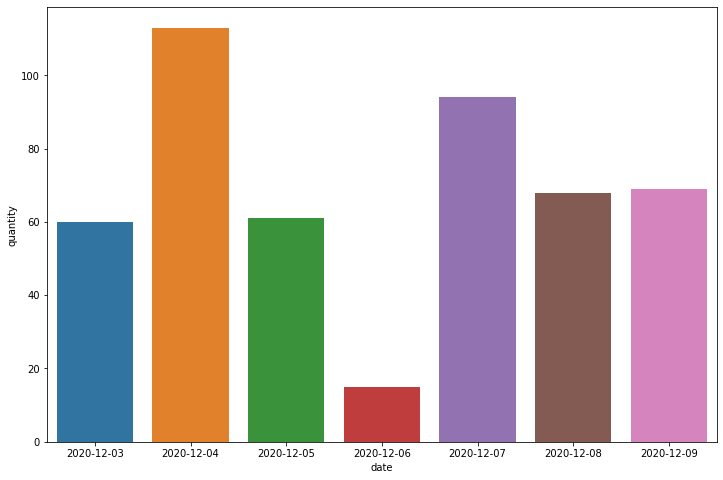

In [43]:
plt.figure(figsize = (12,8))
sns.barplot(x = 'date', y = 'quantity', data = df_sale_date)

Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

Например, пользователь Sasha Tsarev дважды приобрел товар 6. Поскольку покупка была совершена в один и тот же день, повторной в данном случае она считаться не будет. Katya Skriptsova также сделал две покупки товара 7, но в разные дни, поэтому этот случай засчитывается.

In [44]:
df.drop_duplicates(subset =['product_id', 'date', 'name']).groupby(['name','product_id'], as_index = False).agg({'date':'count'}).query('date > 1')



    

,name,product_id,date
37,Anton_Ivanov,15,2
92,Petr_Fedorov,94,2
